**Sales Analytics**

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [49]:
import pandas as pd
df = pd.read_csv('GlobalSuperstore.csv')
df.head()

,Order ID,Order Date,Ship Mode,Customer ID,Segment,Country,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Profit,Shipping Cost,Order Priority
0,CA2012124891,7/31/2012,Same Day,RH-19495,Consumer,United States,US,East,TECAC10003033,Technology,Accessories,2309.650,7,762.1845,933.57,Critical
1,IN201377878,2/5/2013,Second Class,JR-16210,Corporate,Australia,APAC,Oceania,FURCH10003950,Furniture,Chairs,3709.395,9,-288.7650,923.63,Critical
2,IN201371249,10/17/2013,First Class,CR-12730,Consumer,Australia,APAC,Oceania,TECPH10004664,Technology,Phones,5175.171,9,919.9710,915.49,Medium
3,ES20131579342,1/28/2013,First Class,KM-16375,Home Office,Germany,EU,Central,TECPH10004583,Technology,Phones,2892.510,5,-96.5400,910.16,Medium
4,SG20134320,11/5/2013,Same Day,RH-9495,Consumer,Senegal,Africa,Africa,TECSHA10000501,Technology,Copiers,2832.960,8,311.5200,903.04,Critical


In [50]:
df1=df.copy()

In [51]:
df1.shape

(51290, 16)

In [52]:
df1.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Country', 'Market', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Sales', 'Quantity', 'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [53]:
df1.isnull().sum()

Order ID          0
Order Date        0
Ship Mode         0
Customer ID       0
Segment           0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [54]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570


In [55]:
df1.corr(numeric_only=True).style.background_gradient()

,Sales,Quantity,Profit,Shipping Cost
Sales,1.000000,0.313577,0.484918,0.768073
Quantity,0.313577,1.000000,0.104365,0.272649
Profit,0.484918,0.104365,1.000000,0.354441
Shipping Cost,0.768073,0.272649,0.354441,1.000000


In [56]:
df1['Segment'].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

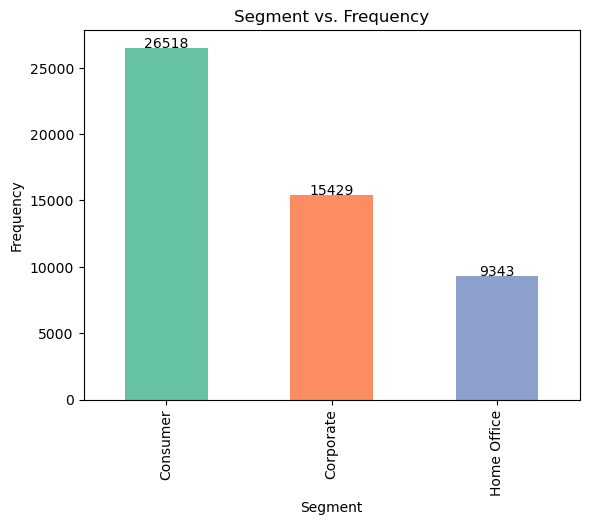

In [57]:
plt.title('Segment vs. Frequency')
plt.xlabel('Segment')
plt.ylabel('Frequency')

ax=df1['Segment'].value_counts()
ax.plot(kind='bar', color=sns.color_palette('Set2'))    

for index, value in enumerate(ax):
    label = f'{value}'  
    plt.text(index, value,label,ha='center')

In [58]:
df1['Order ID'].groupby(df1['Segment']).nunique()

Segment
Consumer       13104
Corporate       7673
Home Office     4687
Name: Order ID, dtype: int64

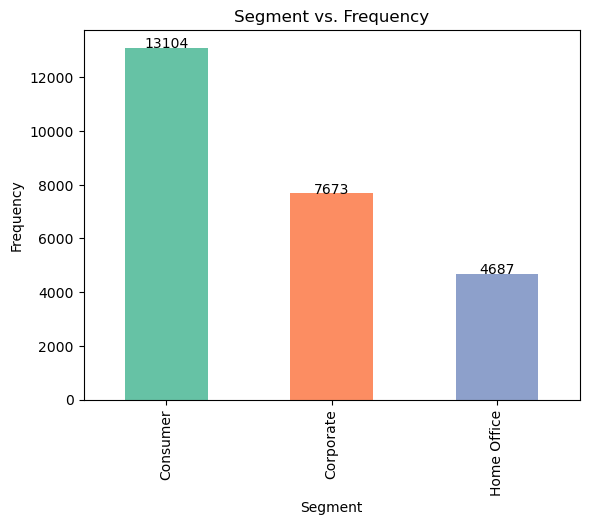

In [59]:
plt.title('Segment vs. Frequency')
plt.xlabel('Segment')
plt.ylabel('Frequency')
ax1=df1['Order ID'].groupby(df1['Segment']).nunique()
ax1.plot(kind='bar', color=sns.color_palette('Set2'))

for index, value in enumerate(ax1):
    label = f'{value}' 
    plt.text(index, value,label,ha='center')

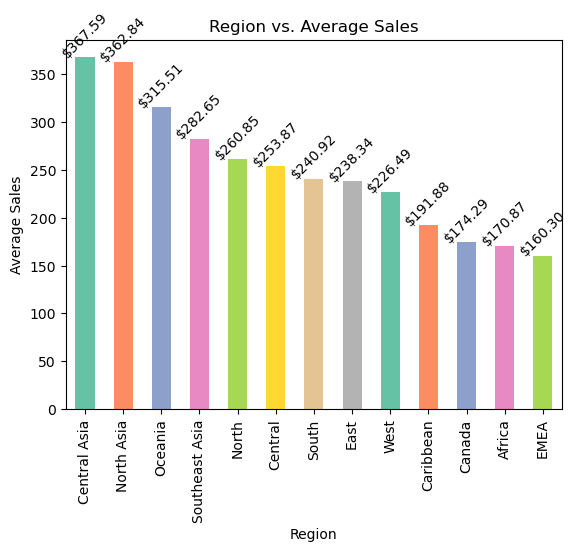

In [60]:
plt.title('Region vs. Average Sales')
plt.xlabel('Region')
plt.ylabel('Average Sales')

ax2=df1['Sales'].groupby(df1['Region']).mean().sort_values(ascending=False)

ax2.plot(kind='bar', color=sns.color_palette("Set2"))

for index, value in enumerate(ax2):
    label = f'${value:.2f}' 
    plt.text(index, value, label, ha='center', rotation=45)

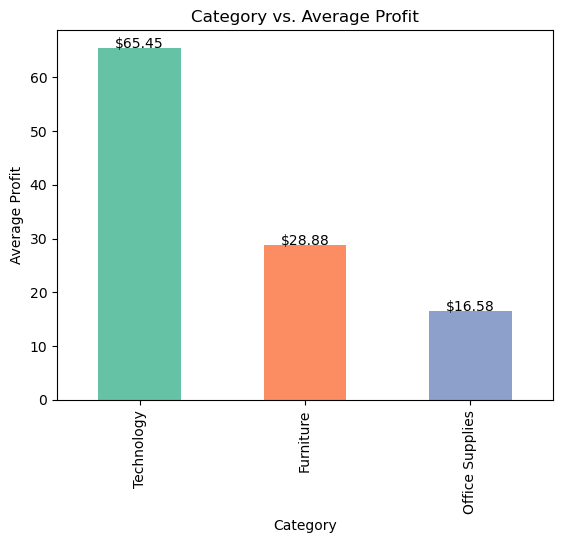

In [61]:
plt.title('Category vs. Average Profit')
plt.xlabel('Category')
plt.ylabel('Average Profit')

ax3=df1['Profit'].groupby(df1['Category']).mean().sort_values(ascending=False)
ax3.plot(kind='bar', color=sns.color_palette('Set2')) 

for index, value in enumerate(ax3):
    label = f'${value:.2f}'  
    plt.text(index, value,label,ha='center')

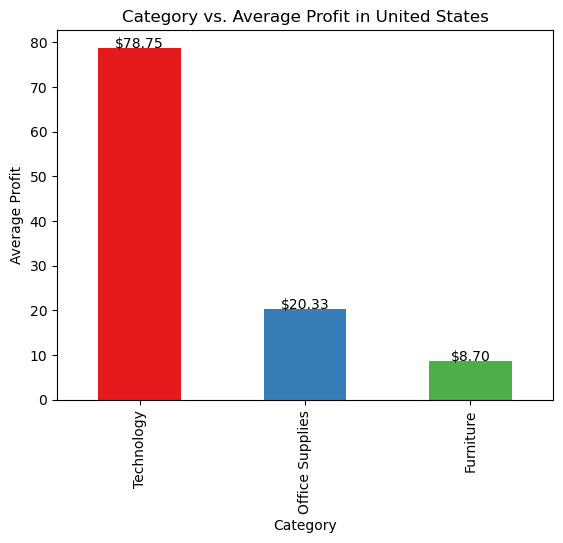

In [78]:
plt.title('Category vs. Average Profit in United States')
plt.xlabel('Category')
plt.ylabel('Average Profit')

df2=df1.loc[(df1['Country']=='United States')].copy()

ax4=df2['Profit'].groupby(df2['Category']).mean().sort_values(ascending=False)
ax4.plot(kind='bar', color=sns.color_palette('Set1')) 

for index, value in enumerate(ax4):
    label = f'${value:.2f}'  
    plt.text(index, value,label,ha='center')

Text(0, 0.5, 'Average Sale & Average Profit')

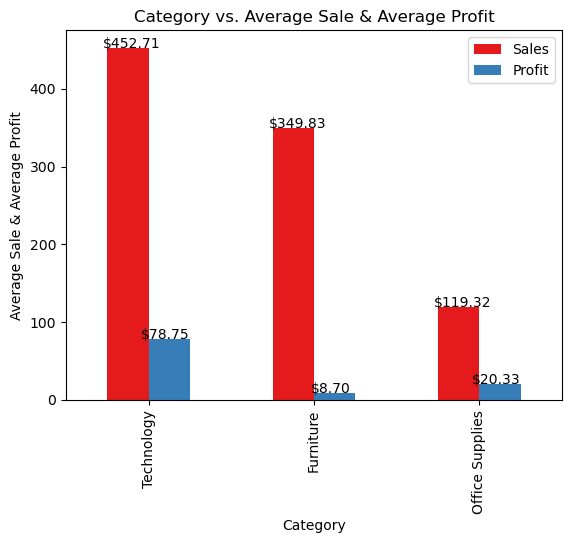

In [63]:
df2=df1.loc[(df1['Country']=='United States')].copy()

ax5=df2[['Sales','Profit']].groupby(df2['Category']).mean().sort_values(by='Sales',ascending=False)

ax5.plot(kind='bar', color=sns.color_palette("Set1"))

for index, (sale, profit) in enumerate(zip(ax5['Sales'], ax5['Profit'])): 
    label_sale = f'${sale:.2f}'
    label_profit = f'${profit:.2f}'
    plt.text(index - 0.1, sale, label_sale, ha='center')
    plt.text(index + 0.1, profit, label_profit, ha='center') 

plt.title('Category vs. Average Sale & Average Profit')
plt.xlabel('Category')
plt.ylabel('Average Sale & Average Profit')

Text(0, 0.5, 'Number of orders')

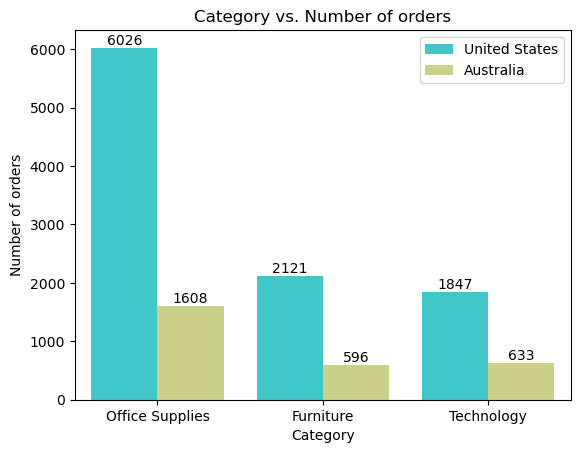

In [64]:
df2=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='United States')].copy()
ax6= df2['Category'].value_counts().sort_values(ascending=False).index
ax7=sns.countplot(x=df2['Category'], hue=df2['Country'], palette="rainbow", order = ax6)
plt.legend(loc='upper right')

for container in ax7.containers: #containers are essentially the bars  that represent the different categories in the countplot.
    ax7.bar_label(container)

plt.title('Category vs. Number of orders')
plt.xlabel('Category')
plt.ylabel('Number of orders')

Text(0, 0.5, 'Number of orders')

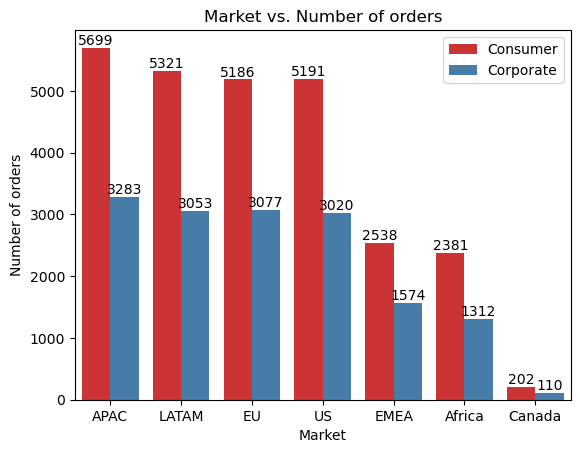

In [65]:
df2=df1.loc[(df1['Segment']=='Consumer')|(df1['Segment']=='Corporate')].copy()
ax8= df2['Market'].value_counts().sort_values(ascending=False).index
ax9=sns.countplot(x=df2['Market'], hue=df2['Segment'], palette="Set1", order = ax8)
plt.legend(loc='upper right')

for a in ax9.containers: 
    ax9.bar_label(a)

plt.legend(loc='upper right')
plt.title('Market vs. Number of orders')
plt.xlabel('Market')
plt.ylabel('Number of orders')

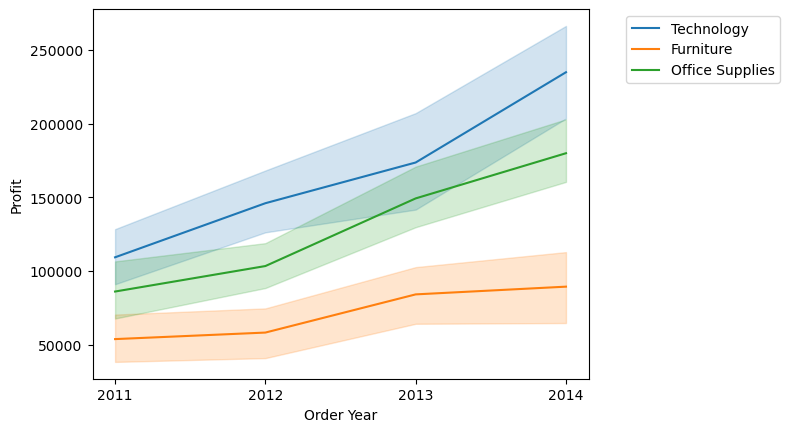

In [66]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Order Year']=df1['Order Date'].dt.year

sns.lineplot(x=df1['Order Year'], y=df1['Profit'], hue=df1['Category'], estimator='sum')

plt.legend(loc='upper right', bbox_to_anchor=(1.4,1))

plt.locator_params(axis='x', nbins=4) 

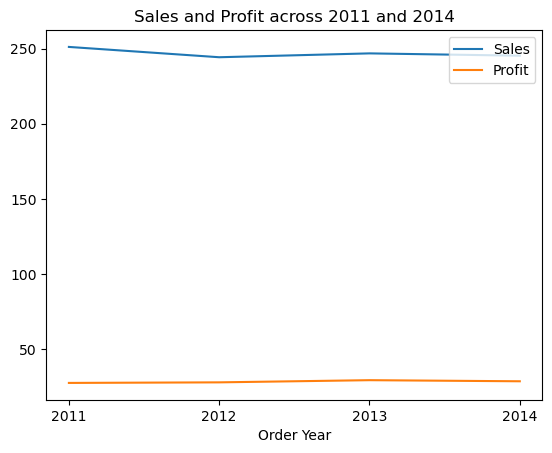

In [67]:
df1['Sales'].groupby(df1['Order Year']).mean().plot(kind='line')
df1['Profit'].groupby(df1['Order Year']).mean().plot(kind='line')
plt.legend(loc='upper right')
plt.locator_params(axis='x', nbins=4)
plt.title("Sales and Profit across 2011 and 2014")
plt.show()

<Axes: >

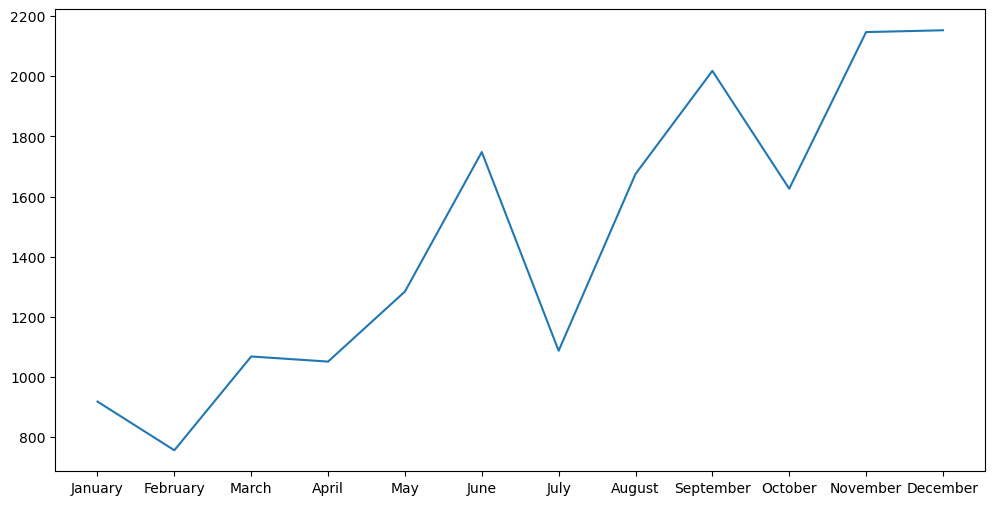

In [68]:
plt.figure(figsize=(12, 6))

df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Order Month']=df1['Order Date'].dt.month_name()
df1['Order Year']=df1['Order Date'].dt.year

ax=df1['Order Month'].loc[df1['Order Year']==2014].value_counts()

plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax = ax.sort_index(key=lambda x: pd.to_datetime(x, format="%B")) 
ax.plot(kind="line")

Text(0, 0.5, ' Number of Ship Mode')

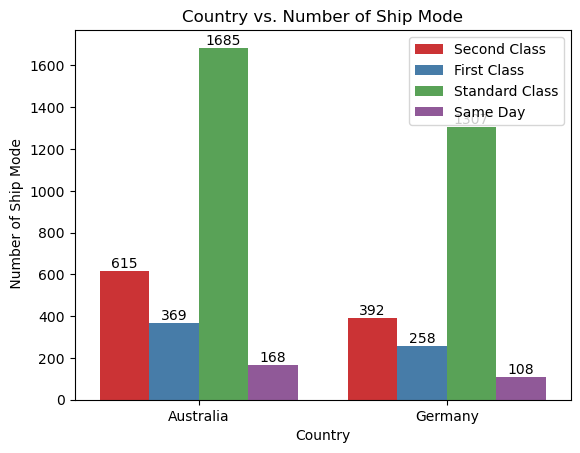

In [69]:
df3=df1.loc[(df1['Country']=='Australia')|(df1['Country']=='Germany')].copy()
ax9= df3['Ship Mode'].value_counts()
ax10=sns.countplot(x=df3['Country'], hue=df3['Ship Mode'], palette="Set1")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))

for a in ax10.containers: 
    ax10.bar_label(a)

plt.legend(loc='upper right')
plt.title('Country vs. Number of Ship Mode')
plt.xlabel('Country')
plt.ylabel(' Number of Ship Mode')

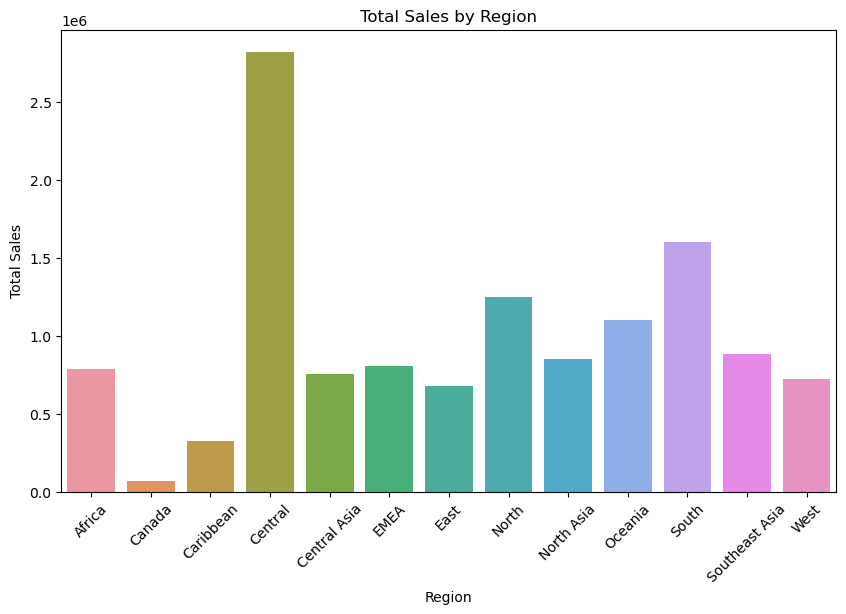

In [70]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

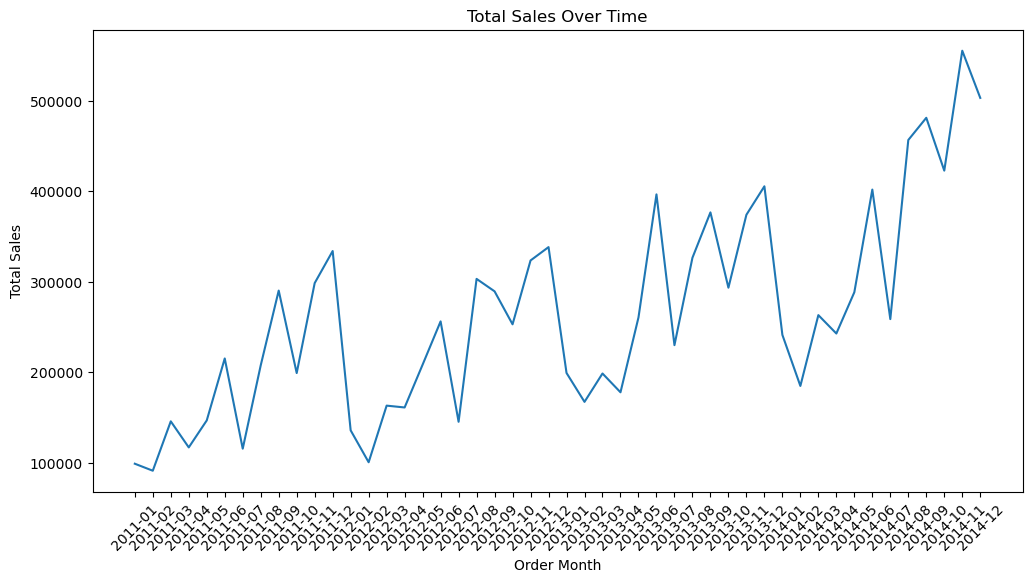

In [71]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.strftime('%Y-%m')

sales_by_month = df.groupby('Order Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Sales', data=sales_by_month)
plt.title('Total Sales Over Time')
plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

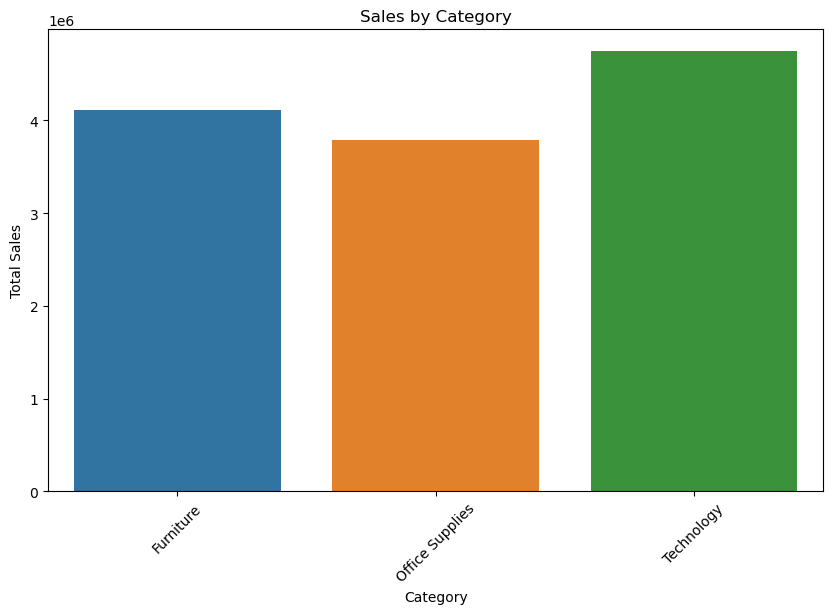

In [72]:
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

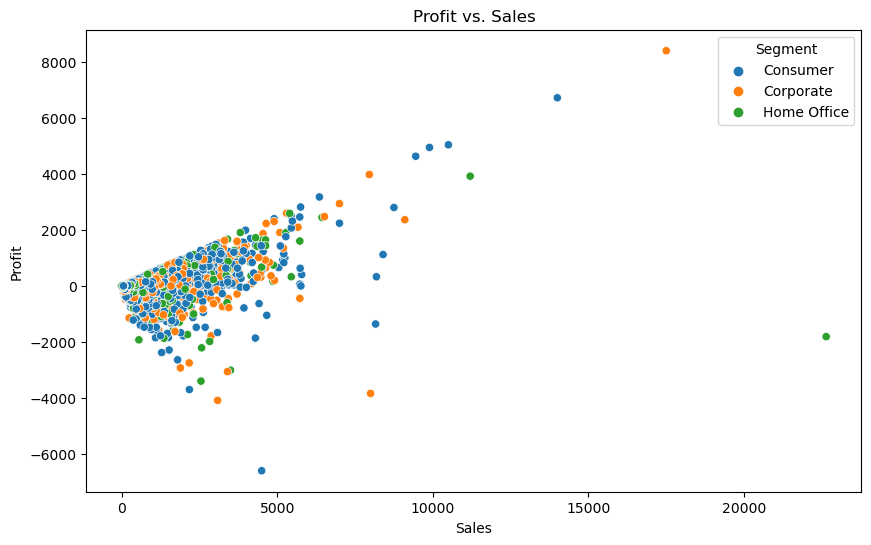

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=df, hue='Segment')
plt.title('Profit vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

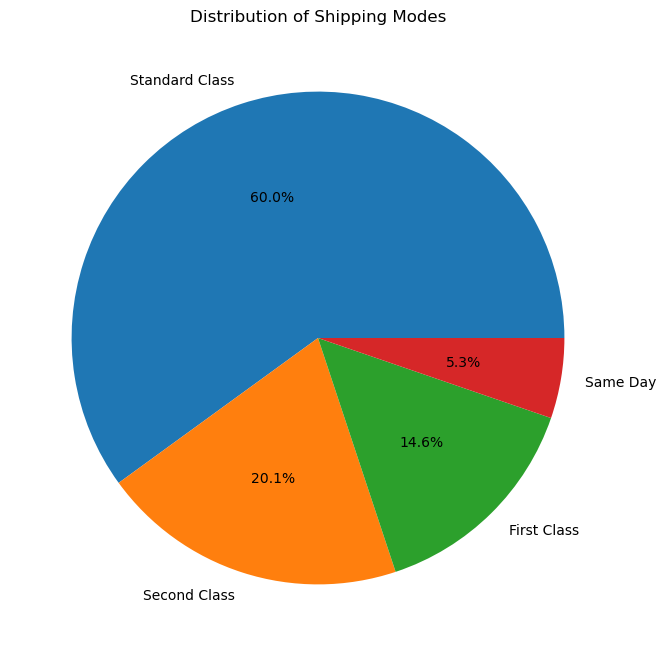

In [74]:
ship_mode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shipping Modes')
plt.show()

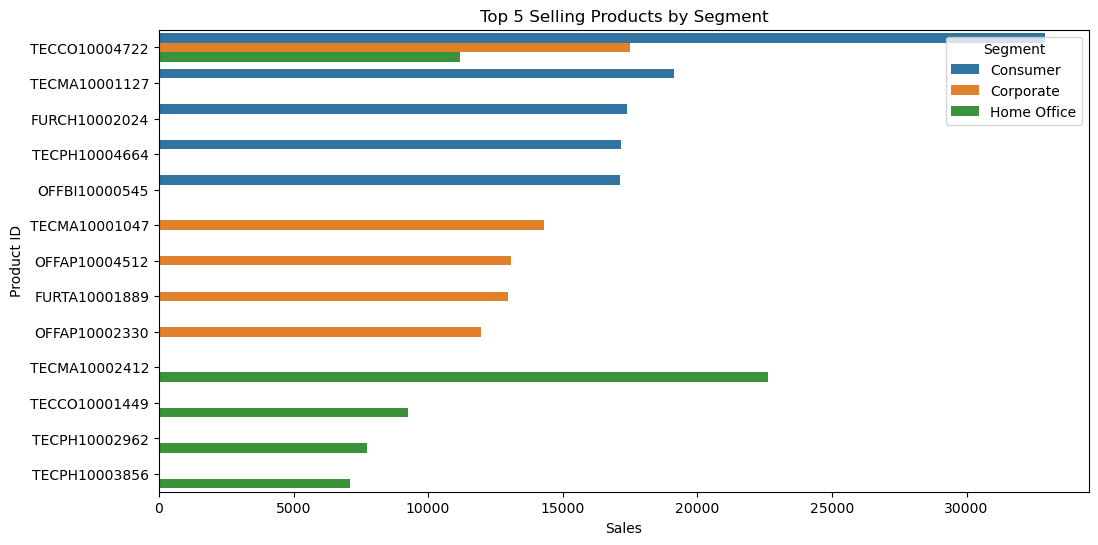

In [75]:
N = 5
top_selling_products_by_segment = df.groupby(['Segment', 'Product ID'])['Sales'].sum().reset_index()
top_selling_products_by_segment = top_selling_products_by_segment.groupby('Segment').apply(lambda x: x.nlargest(N, 'Sales')).reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Product ID', hue='Segment', data=top_selling_products_by_segment, orient='h')
plt.title(f'Top {N} Selling Products by Segment')
plt.xlabel('Sales')
plt.ylabel('Product ID')
plt.legend(title='Segment')
plt.show()

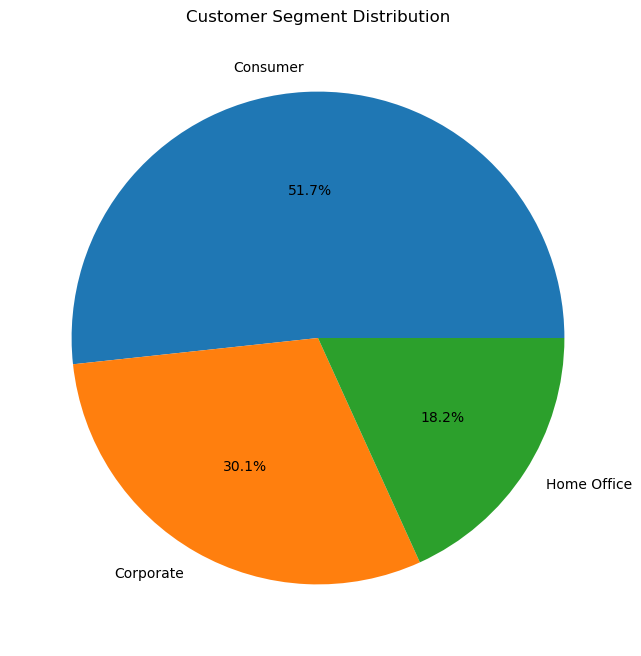

In [76]:
segment_counts = df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%')
plt.title('Customer Segment Distribution')
plt.show()

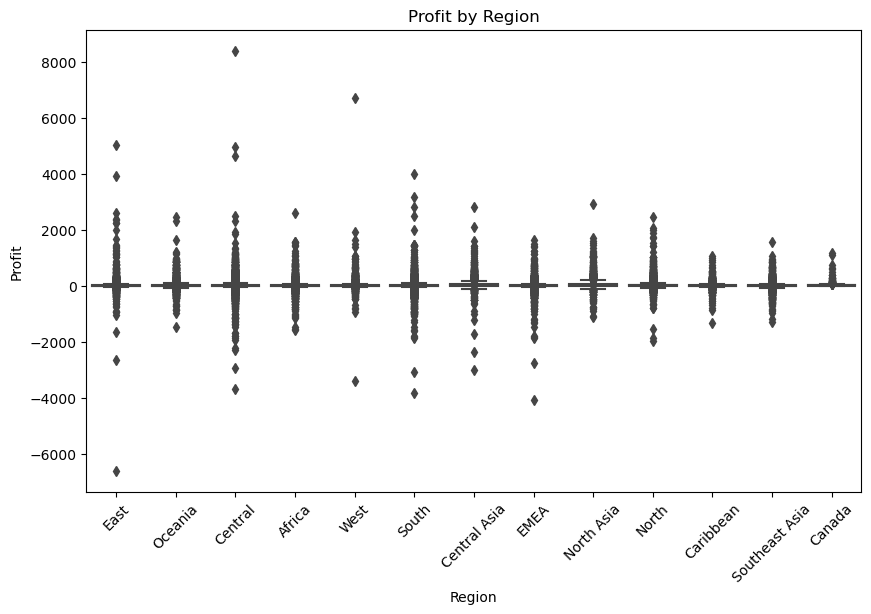

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Profit', data=df)
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()